### 3.2) 10 minutes to pandas ###

In [2]:
import numpy as np
import pandas as pd

### 3.2.1  Object creation ###

See the Data Structure Intro section.


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([2,3,5,np.nan,6,8])

In [4]:
s

0    2.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
### Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [12]:
dates = pd.date_range('20130101', periods=6)

In [13]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

In [15]:
df

,A,B,C,D
2013-01-01,-0.070830,-0.187399,2.420622,0.613701
2013-01-02,-1.453700,0.178357,-0.320601,0.296227
2013-01-03,-0.742096,1.849706,0.829753,-0.053180
2013-01-04,0.316931,-0.154522,-0.595896,0.947385
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331
2013-01-06,1.024895,-0.243094,0.737252,1.206235


In [16]:
#Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [20]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [21]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#The columns of the resulting DataFrame have different dtypes.

In [22]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#If youre using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Heres a subset of the attributes that will be completed:


### 3.2.2 Viewing data ###

In [24]:
#see the basics section.
#Here is how to view the top and bottom rows of the frame:

In [25]:
df.head()

,A,B,C,D
2013-01-01,-0.070830,-0.187399,2.420622,0.613701
2013-01-02,-1.453700,0.178357,-0.320601,0.296227
2013-01-03,-0.742096,1.849706,0.829753,-0.053180
2013-01-04,0.316931,-0.154522,-0.595896,0.947385
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331


In [26]:
df.tail(2)

,A,B,C,D
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331
2013-01-06,1.024895,-0.243094,0.737252,1.206235


In [27]:
#Display the index, columns:

In [28]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [29]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
df.to_numpy()

array([[-0.07083015, -0.18739944,  2.42062221,  0.61370112],
       [-1.45369959,  0.17835741, -0.32060073,  0.29622671],
       [-0.74209639,  1.84970613,  0.82975337, -0.05317956],
       [ 0.31693109, -0.15452158, -0.59589576,  0.94738484],
       [ 0.76393128, -1.1764611 , -0.05394497, -0.03933118],
       [ 1.02489508, -0.24309444,  0.73725171,  1.20623466]])

In [31]:
#For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [32]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [33]:
#Note : DataFrame.to_numpy()doesnotincludetheindexorcolumnlabelsintheoutput.

In [34]:
# describe() shows a quick statistic summary of your data:

In [35]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.026811,0.044431,0.502864,0.495173
std,0.937987,0.994337,1.098635,0.519638
min,-1.453700,-1.176461,-0.595896,-0.053180
25%,-0.574280,-0.229171,-0.253937,0.044558
50%,0.123050,-0.170961,0.341653,0.454964
75%,0.652181,0.095138,0.806628,0.863964
max,1.024895,1.849706,2.420622,1.206235


In [36]:
# Transposing your data:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.070830,-1.453700,-0.742096,0.316931,0.763931,1.024895
B,-0.187399,0.178357,1.849706,-0.154522,-1.176461,-0.243094
C,2.420622,-0.320601,0.829753,-0.595896,-0.053945,0.737252
D,0.613701,0.296227,-0.053180,0.947385,-0.039331,1.206235


In [37]:
#Sorting by an axis:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,0.613701,2.420622,-0.187399,-0.070830
2013-01-02,0.296227,-0.320601,0.178357,-1.453700
2013-01-03,-0.053180,0.829753,1.849706,-0.742096
2013-01-04,0.947385,-0.595896,-0.154522,0.316931
2013-01-05,-0.039331,-0.053945,-1.176461,0.763931
2013-01-06,1.206235,0.737252,-0.243094,1.024895


In [38]:
# Sorting by values:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331
2013-01-06,1.024895,-0.243094,0.737252,1.206235
2013-01-01,-0.070830,-0.187399,2.420622,0.613701
2013-01-04,0.316931,-0.154522,-0.595896,0.947385
2013-01-02,-1.453700,0.178357,-0.320601,0.296227
2013-01-03,-0.742096,1.849706,0.829753,-0.053180


### 3.2.3 Selection

#Note: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

##### Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [39]:
df['A']

2013-01-01   -0.070830
2013-01-02   -1.453700
2013-01-03   -0.742096
2013-01-04    0.316931
2013-01-05    0.763931
2013-01-06    1.024895
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [40]:
df[0:3]

,A,B,C,D
2013-01-01,-0.070830,-0.187399,2.420622,0.613701
2013-01-02,-1.453700,0.178357,-0.320601,0.296227
2013-01-03,-0.742096,1.849706,0.829753,-0.053180


In [41]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.453700,0.178357,-0.320601,0.296227
2013-01-03,-0.742096,1.849706,0.829753,-0.053180
2013-01-04,0.316931,-0.154522,-0.595896,0.947385


### Selection by label

For getting a cross section using a label:

In [42]:
df.loc[dates[0]]

A   -0.070830
B   -0.187399
C    2.420622
D    0.613701
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [43]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.070830,-0.187399
2013-01-02,-1.453700,0.178357
2013-01-03,-0.742096,1.849706
2013-01-04,0.316931,-0.154522
2013-01-05,0.763931,-1.176461
2013-01-06,1.024895,-0.243094


Showing label slicing, both endpoints are included:

In [44]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.453700,0.178357
2013-01-03,-0.742096,1.849706
2013-01-04,0.316931,-0.154522


Reduction in the dimensions of the returned object:

In [45]:
df.loc['20130102',['A','B']]

A   -1.453700
B    0.178357
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [46]:
df.loc[dates[0],'A']

-0.07083015147163674

For getting fast access to a scalar (equivalent to the prior method):

In [47]:
df.at[dates[0],'A']

-0.07083015147163674

### Selection by position

Select via the position of the passed integers:

In [48]:
df.iloc[3]

A    0.316931
B   -0.154522
C   -0.595896
D    0.947385
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [49]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.316931,-0.154522
2013-01-05,0.763931,-1.176461


By lists of integer position locations, similar to the numpy/python style:

In [50]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.453700,-0.320601
2013-01-03,-0.742096,0.829753
2013-01-05,0.763931,-0.053945


For slicing rows explicitly:

In [51]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.453700,0.178357,-0.320601,0.296227
2013-01-03,-0.742096,1.849706,0.829753,-0.053180


For slicing columns explicitly:

In [52]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.187399,2.420622
2013-01-02,0.178357,-0.320601
2013-01-03,1.849706,0.829753
2013-01-04,-0.154522,-0.595896
2013-01-05,-1.176461,-0.053945
2013-01-06,-0.243094,0.737252


For getting a value explicitly:

In [53]:
df.iloc[1,1]

0.1783574061460681

For getting fast access to a scalar (equivalent to the prior method):

In [54]:
df.iat[1,1]

0.1783574061460681

### Boolean indexing

Using a single columns values to select data.

In [55]:
df[df.A>0]

,A,B,C,D
2013-01-04,0.316931,-0.154522,-0.595896,0.947385
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331
2013-01-06,1.024895,-0.243094,0.737252,1.206235


Selecting values from a DataFrame where a boolean condition is met.

In [56]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,2.420622,0.613701
2013-01-02,NaN,0.178357,NaN,0.296227
2013-01-03,NaN,1.849706,0.829753,NaN
2013-01-04,0.316931,NaN,NaN,0.947385
2013-01-05,0.763931,NaN,NaN,NaN
2013-01-06,1.024895,NaN,0.737252,1.206235


Using the isin() method for filtering:

In [57]:
df2 = df.copy()

In [59]:
df2['E'] = ['one','one','two','three','four','three']

In [60]:
df2

,A,B,C,D,E
2013-01-01,-0.070830,-0.187399,2.420622,0.613701,one
2013-01-02,-1.453700,0.178357,-0.320601,0.296227,one
2013-01-03,-0.742096,1.849706,0.829753,-0.053180,two
2013-01-04,0.316931,-0.154522,-0.595896,0.947385,three
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331,four
2013-01-06,1.024895,-0.243094,0.737252,1.206235,three


In [61]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.742096,1.849706,0.829753,-0.053180,two
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331,four


### Setting

Setting a new column automatically aligns the data by the indexes

In [66]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102',periods=6))

In [67]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [68]:
df['F'] = s1

In [69]:
df

,A,B,C,D,F
2013-01-01,-0.070830,-0.187399,2.420622,0.613701,NaN
2013-01-02,-1.453700,0.178357,-0.320601,0.296227,1.0
2013-01-03,-0.742096,1.849706,0.829753,-0.053180,2.0
2013-01-04,0.316931,-0.154522,-0.595896,0.947385,3.0
2013-01-05,0.763931,-1.176461,-0.053945,-0.039331,4.0
2013-01-06,1.024895,-0.243094,0.737252,1.206235,5.0


Setting values by label:

In [70]:
df.at[dates[0],'A'] = 0

Setting values by position:

In [71]:
df.iat[0,1] = 0

Setting by assigning with a NumPy array:

In [73]:
df.loc[:,'D'] = np.array([5]*len(df))

The result of the prior setting operations.

In [74]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,2.420622,5,NaN
2013-01-02,-1.453700,0.178357,-0.320601,5,1.0
2013-01-03,-0.742096,1.849706,0.829753,5,2.0
2013-01-04,0.316931,-0.154522,-0.595896,5,3.0
2013-01-05,0.763931,-1.176461,-0.053945,5,4.0
2013-01-06,1.024895,-0.243094,0.737252,5,5.0


In [75]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,2.420622,5,NaN
2013-01-02,-1.453700,0.178357,-0.320601,5,1.0
2013-01-03,-0.742096,1.849706,0.829753,5,2.0
2013-01-04,0.316931,-0.154522,-0.595896,5,3.0
2013-01-05,0.763931,-1.176461,-0.053945,5,4.0
2013-01-06,1.024895,-0.243094,0.737252,5,5.0


A where operation with setting.

In [76]:
df2 = df.copy()

In [77]:
df2[df2>0] = -df2

In [78]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.420622,-5,NaN
2013-01-02,-1.453700,-0.178357,-0.320601,-5,-1.0
2013-01-03,-0.742096,-1.849706,-0.829753,-5,-2.0
2013-01-04,-0.316931,-0.154522,-0.595896,-5,-3.0
2013-01-05,-0.763931,-1.176461,-0.053945,-5,-4.0
2013-01-06,-1.024895,-0.243094,-0.737252,-5,-5.0


## 3.2.4 Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.


Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [79]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [80]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,2.420622,5,NaN,1.0
2013-01-02,-1.453700,0.178357,-0.320601,5,1.0,1.0
2013-01-03,-0.742096,1.849706,0.829753,5,2.0,NaN
2013-01-04,0.316931,-0.154522,-0.595896,5,3.0,NaN


To drop any rows that have missing data.

In [81]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.4537,0.178357,-0.320601,5,1.0,1.0


Filling missing data.

In [82]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,2.420622,5,5.0,1.0
2013-01-02,-1.453700,0.178357,-0.320601,5,1.0,1.0
2013-01-03,-0.742096,1.849706,0.829753,5,2.0,5.0
2013-01-04,0.316931,-0.154522,-0.595896,5,3.0,5.0


To get the boolean mask where values are nan.

In [83]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


To get the boolean mask where values are nan.

In [84]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 3.2.5 Operations

### Stats

Operations in general exclude missing data.
Performing a descriptive statistic:

In [85]:
df.mean()

A   -0.015006
B    0.075664
C    0.502864
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [86]:
df.mean(1)

2013-01-01    1.855156
2013-01-02    0.880811
2013-01-03    1.787473
2013-01-04    1.513303
2013-01-05    1.706705
2013-01-06    2.303810
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [87]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)

In [88]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [89]:
df.sub(s,axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.742096,0.849706,-0.170247,4.0,1.0
2013-01-04,-2.683069,-3.154522,-3.595896,2.0,0.0
2013-01-05,-4.236069,-6.176461,-5.053945,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data:

In [90]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,2.420622,5,NaN
2013-01-02,-1.453700,0.178357,2.100021,10,1.0
2013-01-03,-2.195796,2.028064,2.929775,15,3.0
2013-01-04,-1.878865,1.873542,2.333879,20,6.0
2013-01-05,-1.114934,0.697081,2.279934,25,10.0
2013-01-06,-0.090039,0.453986,3.017186,30,15.0


In [91]:
df.apply(lambda x: x.max() - x.min() )

A    2.478595
B    3.026167
C    3.016518
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [92]:
s = pd.Series(np.random.randint(0,7,size=10))

In [93]:
s

0    0
1    0
2    1
3    5
4    5
5    4
6    4
7    3
8    5
9    3
dtype: int64

In [94]:
s.value_counts()

5    3
4    2
3    2
0    2
1    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [95]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])

In [96]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 3.2.6 Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [97]:
df = pd.DataFrame(np.random.randn(10,4))

In [98]:
df

,0,1,2,3
0,-0.241533,-1.165318,0.288209,0.594752
1,0.328743,0.194048,0.510261,-0.473321
2,-0.597461,1.642644,1.429974,-0.469114
3,-1.873753,-0.315810,-0.998026,-0.891619
4,-0.175055,0.889197,-0.668378,1.356242
5,-1.972250,0.222323,-3.013810,0.417122
6,1.525452,-0.190025,0.657698,0.962393
7,-0.593829,-2.024689,0.907069,-0.030419
8,1.354147,0.072557,0.088742,-0.967959
9,0.637453,-0.201238,-1.446574,-1.351453


In [100]:
# break it into pieces
pieces = [df[:3],df[3:7],df[7:]]

In [104]:
pd.concat(pieces)

,0,1,2,3
0,-0.241533,-1.165318,0.288209,0.594752
1,0.328743,0.194048,0.510261,-0.473321
2,-0.597461,1.642644,1.429974,-0.469114
3,-1.873753,-0.315810,-0.998026,-0.891619
4,-0.175055,0.889197,-0.668378,1.356242
5,-1.972250,0.222323,-3.013810,0.417122
6,1.525452,-0.190025,0.657698,0.962393
7,-0.593829,-2.024689,0.907069,-0.030419
8,1.354147,0.072557,0.088742,-0.967959
9,0.637453,-0.201238,-1.446574,-1.351453


## Join

SQL style merges. See the Database style joining section.

In [105]:
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})

In [106]:
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})

In [107]:
left

,key,lval
0,foo,1
1,foo,2


In [108]:
right

,key,rval
0,foo,4
1,foo,5


In [110]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [111]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})

In [113]:
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})

In [114]:
left

,key,lval
0,foo,1
1,bar,2


In [115]:
right

,key,rval
0,foo,4
1,bar,5


In [117]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. See the Appending section.

In [118]:
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])

In [119]:
df

,A,B,C,D
0,-0.396120,-0.195872,0.256648,-0.109592
1,0.867880,-2.078826,-1.065899,0.795337
2,-0.314878,0.714687,0.039197,-0.127044
3,1.016806,1.940200,-0.431260,-0.178515
4,-1.590472,1.495388,2.404547,0.458600
5,0.145002,-0.965028,-0.219027,0.893397
6,0.323494,0.243309,0.361538,1.589394
7,-0.800538,0.182247,0.787701,0.506409


In [120]:
s = df.iloc[3]

In [121]:
df.append(s,ignore_index=True)

,A,B,C,D
0,-0.396120,-0.195872,0.256648,-0.109592
1,0.867880,-2.078826,-1.065899,0.795337
2,-0.314878,0.714687,0.039197,-0.127044
3,1.016806,1.940200,-0.431260,-0.178515
4,-1.590472,1.495388,2.404547,0.458600
5,0.145002,-0.965028,-0.219027,0.893397
6,0.323494,0.243309,0.361538,1.589394
7,-0.800538,0.182247,0.787701,0.506409
8,1.016806,1.940200,-0.431260,-0.178515


## 3.2.7 Grouping

By group by we are referring to a process involving one or more of the following steps:

• Splitting the data into groups based on some criteria

• Applying a function to each group independently

• Combining the results into a data structure

In [122]:
df = pd.DataFrame({
    'A':['foo','bar','foo','bar',
        'foo','bar','foo','foo'],
    'B':['one','one','tow','three',
        'two','two','one','three'],
    'C':np.random.randn(8),
    'D':np.random.randn(8)
    
})

In [123]:
df

,A,B,C,D
0,foo,one,-0.469517,-0.682197
1,bar,one,0.304743,-2.255745
2,foo,tow,-0.175306,-1.563126
3,bar,three,-0.039286,0.138457
4,foo,two,0.320340,-0.573846
5,bar,two,1.224799,1.533872
6,foo,one,0.549552,-0.787734
7,foo,three,-2.940523,1.321493


Grouping and then applying the sum() function to the resulting groups.

In [124]:
df.groupby('A').sum()

,C,D
A,,
bar,1.490257,-0.583416
foo,-2.715454,-2.285410


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [125]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.304743 -2.255745
    three -0.039286  0.138457
    two    1.224799  1.533872
foo one    0.080035 -1.469931
    three -2.940523  1.321493
    tow   -0.175306 -1.563126
    two    0.320340 -0.573846

## 3.2.8 Reshaping

See the sections on Hierarchical Indexing and Reshaping.

#### Stack

In [131]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))

In [132]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [133]:
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])

In [134]:
df2 = df[:4]

In [135]:
df2

A         B
first second                    
bar   one    -0.229951  0.169568
      two     0.166649 -1.048286
baz   one     1.199356 -2.134035
      two    -1.958264 -0.740977

The stack() method compresses a level in the DataFrames columns.

In [136]:
stacked = df2.stack()

In [137]:
stacked

first  second   
bar    one     A   -0.229951
               B    0.169568
       two     A    0.166649
               B   -1.048286
baz    one     A    1.199356
               B   -2.134035
       two     A   -1.958264
               B   -0.740977
dtype: float64

With a stacked DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [138]:
stacked.unstack()

A         B
first second                    
bar   one    -0.229951  0.169568
      two     0.166649 -1.048286
baz   one     1.199356 -2.134035
      two    -1.958264 -0.740977

In [139]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.229951  0.166649
      B  0.169568 -1.048286
baz   A  1.199356 -1.958264
      B -2.134035 -0.740977

In [140]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.229951  1.199356
       B  0.169568 -2.134035
two    A  0.166649 -1.958264
       B -1.048286 -0.740977

### Pivot tables

In [141]:
df = pd.DataFrame({'A':['one','one','two','three']*3,
                  'B':['A','B','c']*4,
                   'C':['foo','foo','foo','bar','bar','bar']*2,
                   'D':np.random.randn(12),
                   'E':np.random.randn(12)
                  })

In [142]:
df

,A,B,C,D,E
0,one,A,foo,0.440053,-0.243154
1,one,B,foo,-0.334436,-0.144056
2,two,c,foo,0.662482,-0.259300
3,three,A,bar,2.110181,-0.145238
4,one,B,bar,-0.487221,-0.374322
5,one,c,bar,0.234421,1.171297
6,two,A,foo,-0.268523,1.223565
7,three,B,foo,-2.251915,0.335047
8,one,c,foo,-0.318207,1.026103
9,one,A,bar,0.094729,-1.570059


We can produce pivot tables from this data very easily:

In [143]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A  0.094729  0.440053
      B -0.487221 -0.334436
      c  0.234421 -0.318207
three A  2.110181       NaN
      B       NaN -2.251915
      c -1.444531       NaN
two   A       NaN -0.268523
      B -0.589151       NaN
      c       NaN  0.662482

## 3.2.9 Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency con- version (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. 

In [144]:
reg = pd.date_range('1/1/2012',periods=100,freq='S')

In [145]:
ts = pd.Series(np.random.randint(0,500,len(reg)),index=reg)

In [146]:
ts.resample('5Min').sum()

2012-01-01    24560
Freq: 5T, dtype: int64

Time zone representation:

In [147]:
reg = pd.date_range('3/6/2012 00:00',periods=5,freq='D')

In [148]:
ts = pd.Series(np.random.randn(len(reg)),reg)

In [149]:
ts

2012-03-06   -1.762242
2012-03-07    0.653899
2012-03-08   -0.609691
2012-03-09   -0.421169
2012-03-10   -0.419151
Freq: D, dtype: float64

In [150]:
ts_utc = ts.tz_localize('UTC')

In [151]:
ts_utc

2012-03-06 00:00:00+00:00   -1.762242
2012-03-07 00:00:00+00:00    0.653899
2012-03-08 00:00:00+00:00   -0.609691
2012-03-09 00:00:00+00:00   -0.421169
2012-03-10 00:00:00+00:00   -0.419151
Freq: D, dtype: float64

Converting to another time zone:

In [152]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.762242
2012-03-06 19:00:00-05:00    0.653899
2012-03-07 19:00:00-05:00   -0.609691
2012-03-08 19:00:00-05:00   -0.421169
2012-03-09 19:00:00-05:00   -0.419151
Freq: D, dtype: float64

Converting between time span representations:

In [159]:
reg = pd.date_range('1/1/2012',periods=5,freq='M')

AttributeError: 'Series' object has no attribute 'date_range'

In [160]:
import pandas as pd
ts = pd.Series(np.random.randn(len(reg)),index=reg)

In [155]:
ts

2012-01-31   -0.610961
2012-02-29    0.954197
2012-03-31   -0.291554
2012-04-30   -1.883440
2012-05-31   -0.324126
Freq: M, dtype: float64

In [161]:
ps = ts.to_period()

In [162]:
ps

2012-01   -1.253265
2012-02    0.065910
2012-03   -0.385119
2012-04    1.104273
2012-05    0.657089
Freq: M, dtype: float64

In [163]:
ps.to_timestamp()

2012-01-01   -1.253265
2012-02-01    0.065910
2012-03-01   -0.385119
2012-04-01    1.104273
2012-05-01    0.657089
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [165]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [166]:
ts = pd.Series(np.random.randn(len(prng)),prng)

In [167]:
ts.index = (prng.asfreq('M','e')+1).asfreq('H','s')+9

In [168]:
ts.head()

1990-03-01 09:00   -0.319631
1990-06-01 09:00   -1.332689
1990-09-01 09:00    1.063250
1990-12-01 09:00   -1.617314
1991-03-01 09:00   -0.096703
Freq: H, dtype: float64

## 3.2.10 Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.


In [169]:
 df = pd.DataFrame({"id":[1,2,3,4,5,6],
                   'raw_grade':['a','b','b','a','a','e']})

Convert the raw grades to a categorical data type.

In [170]:
df['grade'] = df['raw_grade'].astype('category')

In [171]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [174]:
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])

In [175]:
df['grade']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [176]:
df.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


Grouping by a categorical column also shows empty categories.

In [177]:
df.groupby('grade').size()

grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

## 3.2.11 Plotting

In [179]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))

In [180]:
ts = ts.cumsum()

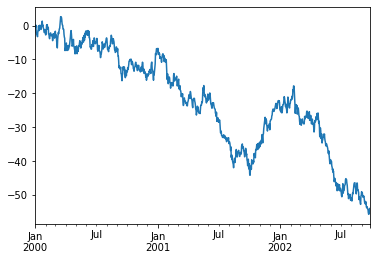

In [181]:
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [182]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])

In [183]:
df = df.cumsum()

## 3.2.9 Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency con- version (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [186]:
rng = pd.date_range('1/1/2012',periods=100,freq='S')

In [188]:
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)

In [189]:
ts.resample('5Min').sum()

2012-01-01    26721
Freq: 5T, dtype: int64

Time zone representation:

In [190]:
rng = pd.date_range('3/6/2012 00:00',periods=5,freq='D')

In [191]:
ts = pd.Series(np.random.randn(len(rng)),rng)

In [192]:
ts

2012-03-06    0.292454
2012-03-07    1.148914
2012-03-08   -0.845067
2012-03-09   -0.012482
2012-03-10   -0.023774
Freq: D, dtype: float64

In [193]:
ts_utc = ts.tz_localize('UTC')

In [194]:
ts_utc

2012-03-06 00:00:00+00:00    0.292454
2012-03-07 00:00:00+00:00    1.148914
2012-03-08 00:00:00+00:00   -0.845067
2012-03-09 00:00:00+00:00   -0.012482
2012-03-10 00:00:00+00:00   -0.023774
Freq: D, dtype: float64

Converting to another time zone:

In [195]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.292454
2012-03-06 19:00:00-05:00    1.148914
2012-03-07 19:00:00-05:00   -0.845067
2012-03-08 19:00:00-05:00   -0.012482
2012-03-09 19:00:00-05:00   -0.023774
Freq: D, dtype: float64

Converting between time span representations:

In [197]:
rng = pd.date_range('1/1/2012',periods=5,freq='M')

In [198]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [199]:
ts

2012-01-31    1.658641
2012-02-29   -1.038504
2012-03-31   -0.754855
2012-04-30   -1.586921
2012-05-31    0.765503
Freq: M, dtype: float64

In [200]:
ps = ts.to_period()

In [201]:
ps

2012-01    1.658641
2012-02   -1.038504
2012-03   -0.754855
2012-04   -1.586921
2012-05    0.765503
Freq: M, dtype: float64

In [202]:
ps.to_timestamp()

2012-01-01    1.658641
2012-02-01   -1.038504
2012-03-01   -0.754855
2012-04-01   -1.586921
2012-05-01    0.765503
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [203]:
prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')

In [204]:
ts = pd.Series(np.random.randn(len(prng)),prng)

In [205]:
ts.index = (prng.asfreq('M','e')+1).asfreq('H','s')+9

ts.head()

## 3.2.10 Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [207]:
df = pd.DataFrame({"id":[1,2,3,4,5,7],
                  'raw_grade':['a','b','b','a','a','e']})

Convert the raw grades to a categorical data type.

In [208]:
df['grade'] = df['raw_grade'].astype('category')

In [209]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [210]:
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])

In [211]:
df['grade']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [212]:
df.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,7,e,NaN


Grouping by a categorical column also shows empty categories.

In [213]:
df.groupby('grade').size()

grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

## 3.2.11 Plotting

In [215]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000',periods=1000))

In [216]:
ts = ts.cumsum()

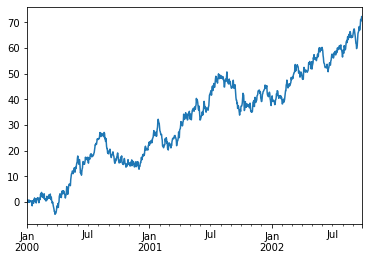

In [217]:
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [218]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])

In [219]:
df = df.cumsum()

In [221]:
import matplotlib.pyplot as plt

In [223]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

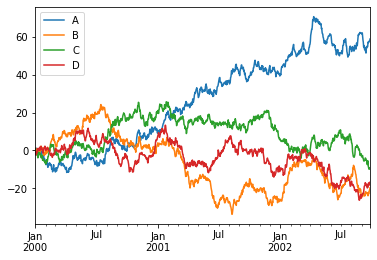

In [224]:
df.plot()

No handles with labels found to put in legend.


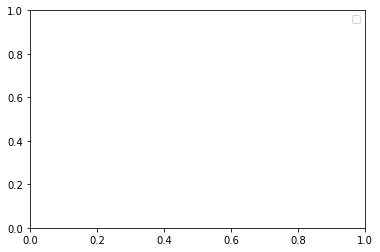

In [225]:
plt.legend(loc='best')